In [1]:
import pandas as pd
data = pd.read_json(r'C:\News_Category_Dataset_v3.json', lines=True)
print(data.head())
print(data.info())
print(data['category'].value_counts())


                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

In [2]:
data['text'] = data['headline'] + " " + data['short_description']
print(data[['text', 'category']].head())

                                                text   category
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY
3  The Funniest Tweets From Parents This Week (Se...  PARENTING
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS


In [4]:
from sklearn.model_selection import train_test_split
X = data['text']
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

print(f'train：{X_train.shape[0]}')
print(f'test：{X_test.shape[0]}')

train：167621
test：41906


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(f'TF-IDF：{X_train_tfidf.shape[1]}')


TF-IDF：20000


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.4f}')

report = classification_report(y_test, y_pred)
print(report)


accuracy: 0.6026
                precision    recall  f1-score   support

          ARTS       0.42      0.18      0.25       302
ARTS & CULTURE       0.41      0.12      0.18       268
  BLACK VOICES       0.54      0.35      0.43       917
      BUSINESS       0.51      0.47      0.49      1198
       COLLEGE       0.50      0.32      0.39       229
        COMEDY       0.61      0.39      0.48      1080
         CRIME       0.58      0.55      0.56       712
CULTURE & ARTS       0.71      0.21      0.32       215
       DIVORCE       0.84      0.65      0.73       685
     EDUCATION       0.46      0.26      0.33       203
 ENTERTAINMENT       0.56      0.79      0.65      3473
   ENVIRONMENT       0.64      0.20      0.31       289
         FIFTY       0.64      0.16      0.26       280
  FOOD & DRINK       0.62      0.74      0.67      1268
     GOOD NEWS       0.47      0.14      0.22       280
         GREEN       0.42      0.32      0.36       524
HEALTHY LIVING       0.44     

In [8]:
import numpy as np

print("y_train unique values:", np.unique(y_train))
print("y_test unique values:", np.unique(y_test))

y_train unique values: ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'U.S. NEWS'
 'WEDDINGS' 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']
y_test unique values: ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'U.S. NEWS'
 'WEDDINGS' 'WEIRD NEWS' 'WELLNESS' '

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Encoded classes:", label_encoder.classes_)


Encoded classes: ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'U.S. NEWS'
 'WEDDINGS' 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']


In [11]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.1
scikit-learn version: 1.6.1


In [ ]:
from scipy.sparse import csr_matrix

X_train_csr = csr_matrix(X_train_tfidf)  
X_test_csr = csr_matrix(X_test_tfidf)

xgb_model.fit(X_train_csr, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test_csr)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy:.4f}')

print(classification_report(y_test_encoded, y_pred_xgb))




XGBoost Accuracy: 0.0856
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.00      0.00      0.00       268
           2       0.00      0.00      0.00       917
           3       0.00      0.00      0.00      1198
           4       0.00      0.00      0.00       229
           5       0.00      0.00      0.00      1080
           6       0.00      0.00      0.00       712
           7       0.00      0.00      0.00       215
           8       0.00      0.00      0.00       685
           9       0.00      0.00      0.00       203
          10       0.00      0.00      0.00      3473
          11       0.00      0.00      0.00       289
          12       0.00      0.00      0.00       280
          13       0.00      0.00      0.00      1268
          14       0.00      0.00      0.00       280
          15       0.00      0.00      0.00       524
          16       0.00      0.00      0.00      1339
  

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=20,  
    random_state=42,
    n_jobs=-1  
)

rf_model.fit(X_train_tfidf, y_train_encoded)

y_pred_rf = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_encoded, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy:.4f}')

print(classification_report(y_test_encoded, y_pred_rf))


Random Forest Accuracy: 0.2585
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.00      0.00      0.00       268
           2       1.00      0.00      0.01       917
           3       0.00      0.00      0.00      1198
           4       0.00      0.00      0.00       229
           5       1.00      0.00      0.00      1080
           6       0.00      0.00      0.00       712
           7       0.00      0.00      0.00       215
           8       0.93      0.18      0.31       685
           9       0.00      0.00      0.00       203
          10       0.66      0.13      0.22      3473
          11       0.00      0.00      0.00       289
          12       0.00      0.00      0.00       280
          13       0.79      0.15      0.26      1268
          14       0.00      0.00      0.00       280
          15       0.00      0.00      0.00       524
          16       0.00      0.00      0.00      1

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', n_jobs=-1)

model_balanced.fit(X_train_tfidf, y_train)

y_pred_balanced = model_balanced.predict(X_test_tfidf)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'new_accuracy(class_weight balanced): {accuracy_balanced:.4f}')


print(classification_report(y_test, y_pred_balanced))


new_accuracy(class_weight balanced): 0.5411
                precision    recall  f1-score   support

          ARTS       0.20      0.36      0.26       302
ARTS & CULTURE       0.22      0.37      0.27       268
  BLACK VOICES       0.42      0.48      0.45       917
      BUSINESS       0.49      0.46      0.47      1198
       COLLEGE       0.34      0.56      0.42       229
        COMEDY       0.51      0.49      0.50      1080
         CRIME       0.48      0.64      0.55       712
CULTURE & ARTS       0.32      0.41      0.36       215
       DIVORCE       0.75      0.72      0.74       685
     EDUCATION       0.26      0.60      0.37       203
 ENTERTAINMENT       0.75      0.52      0.61      3473
   ENVIRONMENT       0.31      0.41      0.35       289
         FIFTY       0.19      0.42      0.26       280
  FOOD & DRINK       0.65      0.60      0.62      1268
     GOOD NEWS       0.20      0.37      0.26       280
         GREEN       0.33      0.46      0.38       524
HEA

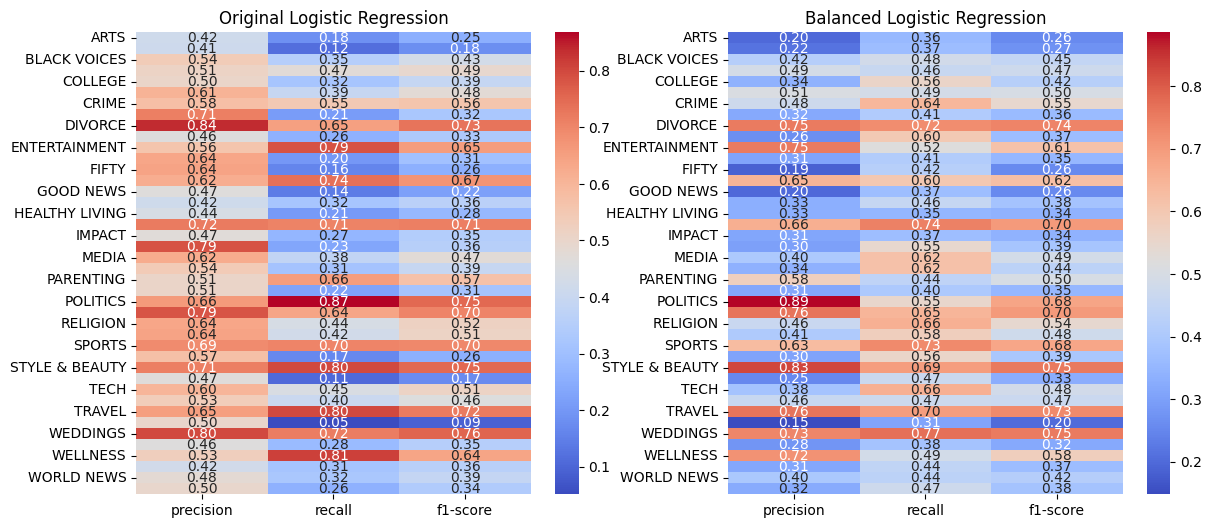

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

report_original = classification_report(y_test, y_pred, output_dict=True)
report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)

df_original = pd.DataFrame(report_original).T.drop(["accuracy", "macro avg", "weighted avg"])
df_balanced = pd.DataFrame(report_balanced).T.drop(["accuracy", "macro avg", "weighted avg"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(df_original.iloc[:, :3], annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Original Logistic Regression")

sns.heatmap(df_balanced.iloc[:, :3], annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Balanced Logistic Regression")

plt.show()


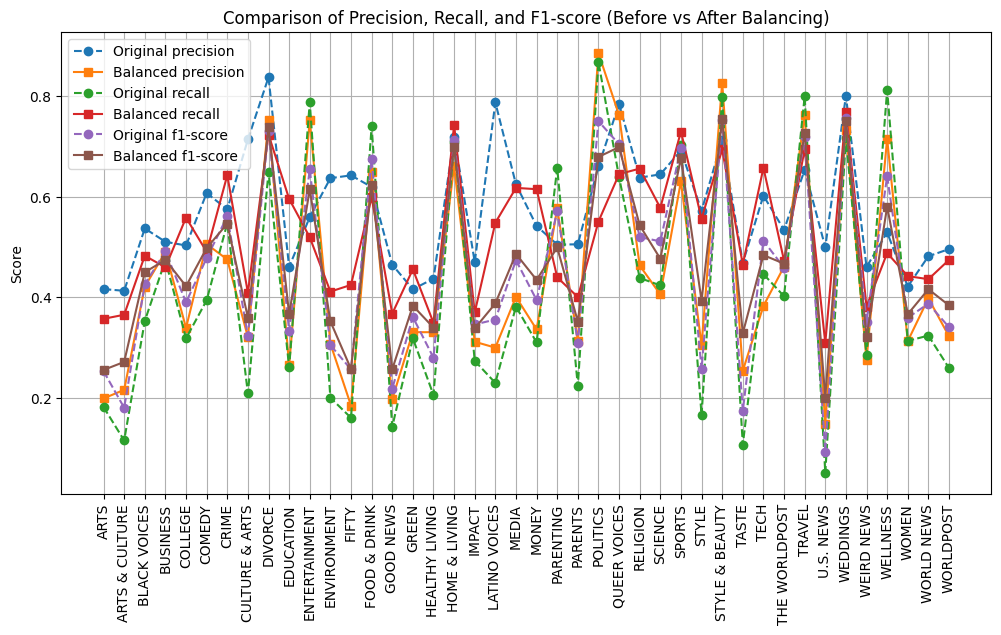

In [ ]:

plt.figure(figsize=(12, 6))

for metric in ["precision", "recall", "f1-score"]:
    plt.plot(df_original.index, df_original[metric], marker="o", linestyle="--", label=f"Original {metric}")
    plt.plot(df_balanced.index, df_balanced[metric], marker="s", linestyle="-", label=f"Balanced {metric}")

plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title("Comparison of Precision, Recall, and F1-score (Before vs After Balancing)")
plt.legend()
plt.grid()
plt.show()


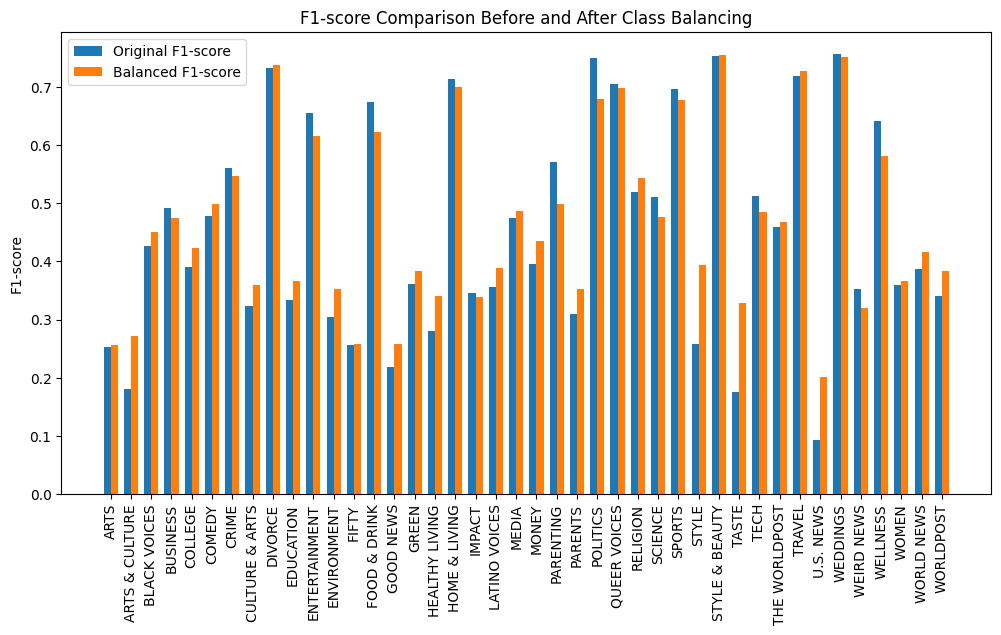

In [ ]:
import numpy as np


f1_original = df_original["f1-score"]
f1_balanced = df_balanced["f1-score"]
categories = df_original.index


x = np.arange(len(categories))
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, f1_original, width, label="Original F1-score")
bars2 = ax.bar(x + width/2, f1_balanced, width, label="Balanced F1-score")

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.set_ylabel("F1-score")
ax.set_title("F1-score Comparison Before and After Class Balancing")
ax.legend()

plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'sag', 'saga']
}

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

# Perform grid search optimized for weighted F1-score
grid_search_f1 = GridSearchCV(logreg, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_f1.fit(X_train_tfidf, y_train)

# Output best parameters
print("Best parameters (optimized by weighted F1-score):", grid_search_f1.best_params_)

# Predict on test dataset using the best model
y_pred_f1 = grid_search_f1.predict(X_test_tfidf)

# Evaluate accuracy on test dataset
accuracy_f1 = accuracy_score(y_test, y_pred_f1)
print(f'Accuracy of optimized model (F1 optimization): {accuracy_f1:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred_f1))


Best parameters (optimized by weighted F1-score): {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}
Accuracy of optimized model (F1 optimization): 0.5922
                precision    recall  f1-score   support

          ARTS       0.36      0.25      0.29       302
ARTS & CULTURE       0.35      0.19      0.25       268
  BLACK VOICES       0.46      0.41      0.43       917
      BUSINESS       0.46      0.45      0.46      1198
       COLLEGE       0.51      0.40      0.45       229
        COMEDY       0.48      0.40      0.44      1080
         CRIME       0.55      0.56      0.55       712
CULTURE & ARTS       0.53      0.25      0.34       215
       DIVORCE       0.81      0.67      0.73       685
     EDUCATION       0.44      0.32      0.37       203
 ENTERTAINMENT       0.60      0.73      0.66      3473
   ENVIRONMENT       0.48      0.31      0.37       289
         FIFTY       0.44      0.23      0.30       280
  FOOD & DRINK       0.63      0.67      0.65      1268
    

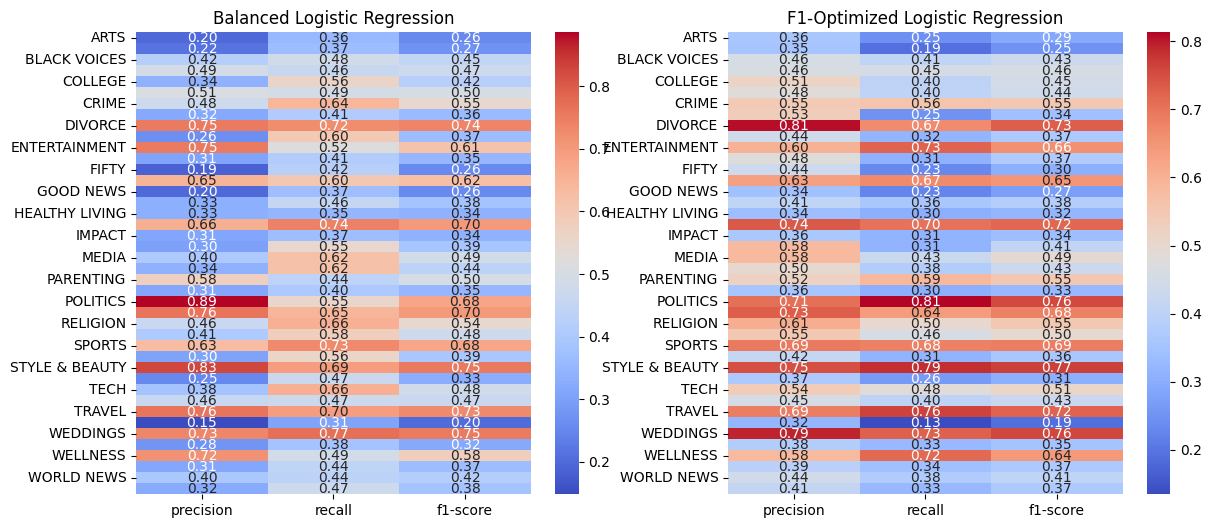

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)
report_f1_optimized = classification_report(y_test, y_pred_f1, output_dict=True)

df_balanced = pd.DataFrame(report_balanced).T.drop(["accuracy", "macro avg", "weighted avg"])
df_f1_optimized = pd.DataFrame(report_f1_optimized).T.drop(["accuracy", "macro avg", "weighted avg"])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(df_balanced.iloc[:, :3], annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Balanced Logistic Regression")

sns.heatmap(df_f1_optimized.iloc[:, :3], annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("F1-Optimized Logistic Regression")

plt.show()


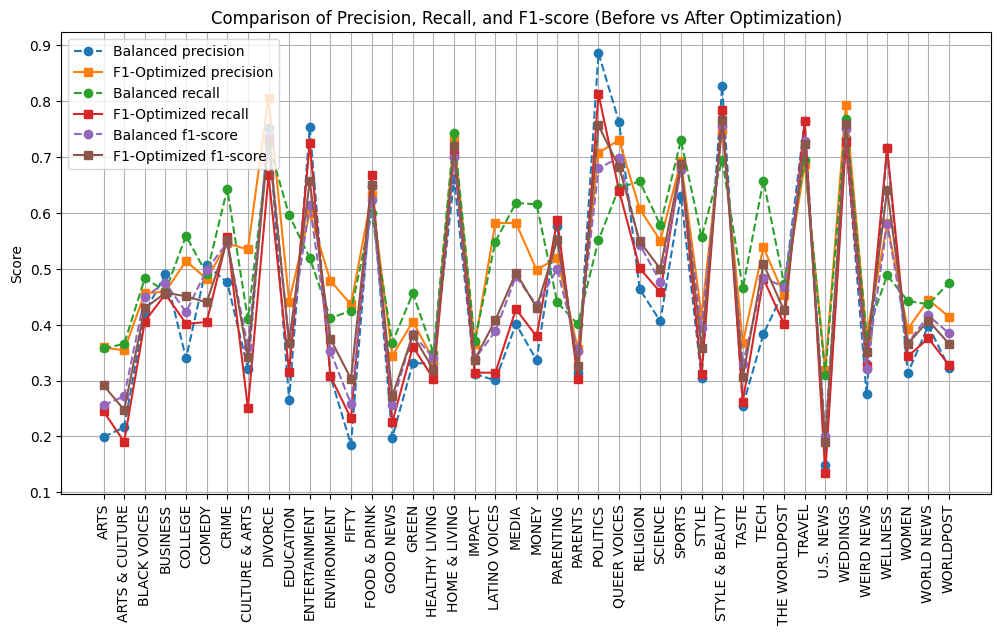

In [ ]:

plt.figure(figsize=(12, 6))

for metric in ["precision", "recall", "f1-score"]:
    plt.plot(df_balanced.index, df_balanced[metric], marker="o", linestyle="--", label=f"Balanced {metric}")
    plt.plot(df_f1_optimized.index, df_f1_optimized[metric], marker="s", linestyle="-", label=f"F1-Optimized {metric}")

plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title("Comparison of Precision, Recall, and F1-score (Before vs After Optimization)")
plt.legend()
plt.grid()
plt.show()


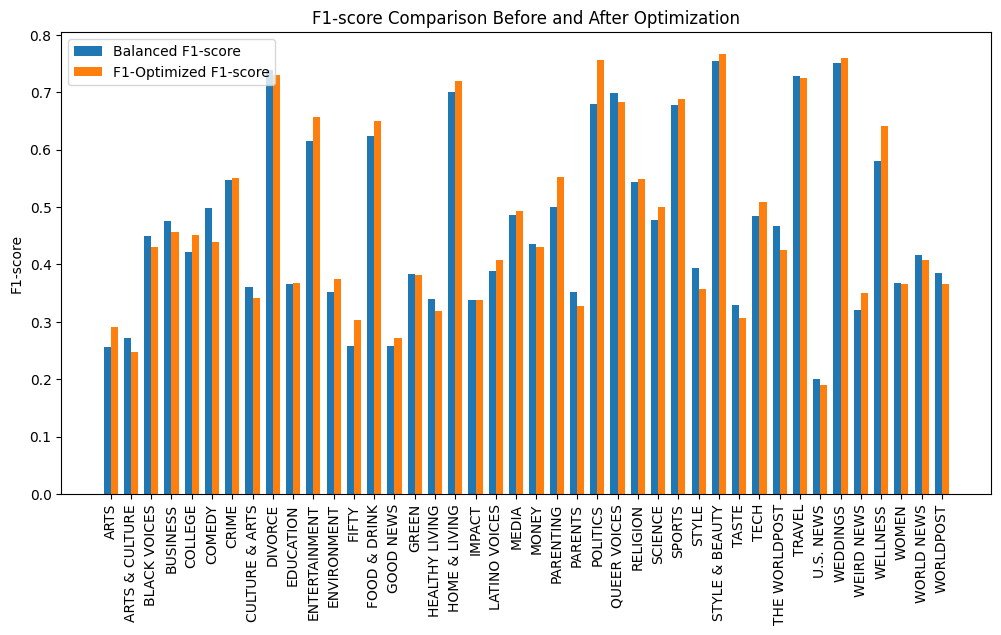

In [ ]:
import numpy as np


f1_balanced = df_balanced["f1-score"]
f1_optimized = df_f1_optimized["f1-score"]
categories = df_balanced.index


x = np.arange(len(categories))
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, f1_balanced, width, label="Balanced F1-score")
bars2 = ax.bar(x + width/2, f1_optimized, width, label="F1-Optimized F1-score")

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.set_ylabel("F1-score")
ax.set_title("F1-score Comparison Before and After Optimization")
ax.legend()

plt.show()


In [15]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.5.1+cu121
True
NVIDIA GeForce RTX 4070 Laptop GPU


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Refit and transform
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [18]:
X_train_tensor = torch.tensor(X_train_tfidf.toarray(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_tfidf.toarray(), dtype=torch.float32).to(device)


In [20]:
from sklearn.preprocessing import LabelEncoder
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to tensors and upload to GPU
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# Now num_classes will work correctly
num_classes = len(label_encoder.classes_)


In [ ]:
import torch.nn as nn

# Define logistic regression model
class LogisticRegressionTorch(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

# Initialize model and move to GPU
input_size = X_train_tensor.shape[1]  # 5000
num_classes = len(label_encoder.classes_)  
model = LogisticRegressionTorch(input_size=input_size, num_classes=num_classes).to(device)


In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [25]:
def train_model(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for features, labels in loader:
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')


In [26]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for features, labels in loader:
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, preds)
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(true_labels, preds, target_names=label_encoder.classes_))


In [27]:
# Create DataLoader
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Train model
train_model(model, train_loader, criterion, optimizer, epochs=5)

# Evaluate model performance
evaluate(model, test_loader)


Epoch [1/5], Loss: 3.2854
Epoch [2/5], Loss: 2.7426
Epoch [3/5], Loss: 2.4432
Epoch [4/5], Loss: 2.2209
Epoch [5/5], Loss: 2.0440
Accuracy: 0.4839
                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00       302
ARTS & CULTURE       0.00      0.00      0.00       268
  BLACK VOICES       0.71      0.07      0.12       917
      BUSINESS       0.55      0.16      0.25      1198
       COLLEGE       0.00      0.00      0.00       229
        COMEDY       0.73      0.12      0.20      1080
         CRIME       0.61      0.37      0.46       712
CULTURE & ARTS       0.00      0.00      0.00       215
       DIVORCE       0.93      0.40      0.56       685
     EDUCATION       0.00      0.00      0.00       203
 ENTERTAINMENT       0.40      0.78      0.53      3473
   ENVIRONMENT       1.00      0.04      0.08       289
         FIFTY       0.00      0.00      0.00       280
  FOOD & DRINK       0.59      0.64      0.62      1268
     GOOD NE

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    tree_method='gpu_hist',  
    eval_metric='mlogloss'
)
